In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df_wind=pd.read_csv("D:/UNIVERSITY OF VERONA/Second Year/Statistical models for data science/Project/WindEnergy.csv",index_col='utc_timestamp')
df_wind.head()

,wind_generation_actual,wind_capacity,temperature
utc_timestamp,,,
2017-01-01 00:00:00+00:00,291760.0,37149.130,-2.117
2017-01-02 00:00:00+00:00,295097.0,37152.125,-1.154
2017-01-03 00:00:00+00:00,666170.0,37155.208,-0.239
2017-01-04 00:00:00+00:00,686581.0,37160.125,0.620
2017-01-05 00:00:00+00:00,261759.0,37163.542,-3.908


In [4]:
df_wind.info()
print('----------------------------------------------------------')
print(f'The shape of the dataframe is : {df_wind.shape}')

<class 'pandas.core.frame.DataFrame'>
Index: 1094 entries, 2017-01-01 00:00:00+00:00 to 2019-12-30 00:00:00+00:00
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   wind_generation_actual  1094 non-null   float64
 1   wind_capacity           1094 non-null   float64
 2   temperature             1094 non-null   float64
dtypes: float64(3)
memory usage: 34.2+ KB
----------------------------------------------------------
The shape of the dataframe is : (1094, 3)


So, we have zero null value in our data set.

In [5]:
df_wind.isna().sum()

wind_generation_actual    0
wind_capacity             0
temperature               0
dtype: int64

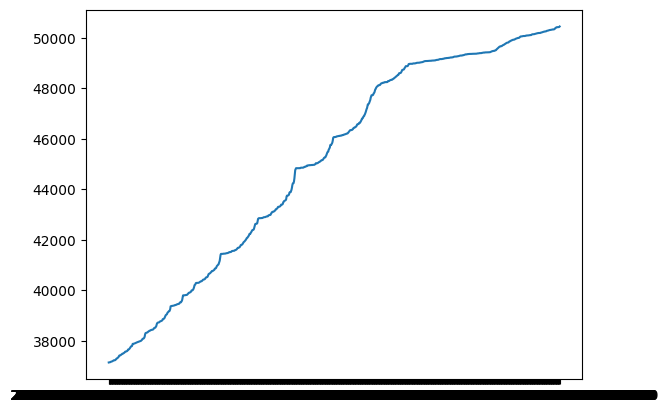

In [6]:
plt.plot(df_wind['wind_capacity'])
#df_wind['wind_generation_actual'].plot()


In [8]:
#df_wind_corr=df_wind.drop('utc_timestamp', axis=1)
df_wind.corr()

,wind_generation_actual,wind_capacity,temperature
wind_generation_actual,1.000000,0.127708,-0.325831
wind_capacity,0.127708,1.000000,0.112132
temperature,-0.325831,0.112132,1.000000


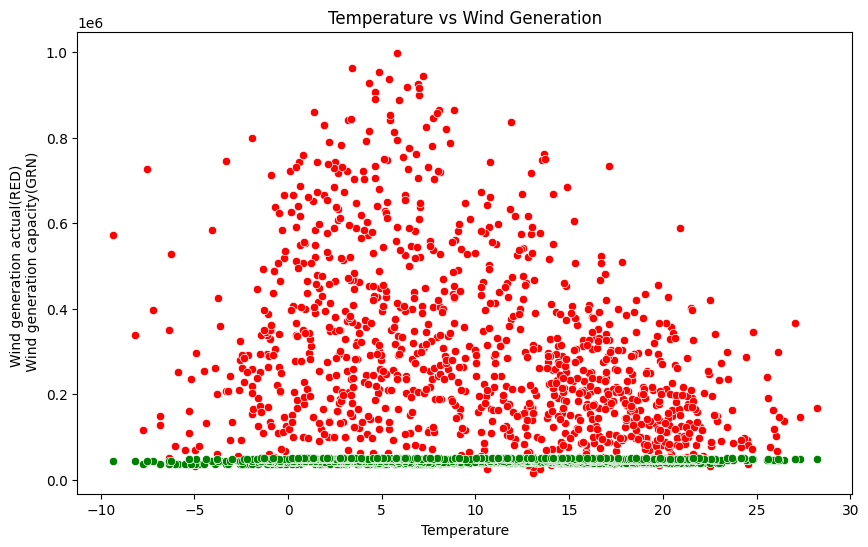

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='temperature',y='wind_generation_actual', data=y_wind,c='r')
sns.scatterplot(x='temperature',y='wind_capacity', data=df_wind,c='g')
plt.title('Temperature vs Wind Generation')
plt.xlabel('Temperature')
plt.ylabel('Wind generation actual(RED) \n Wind generation capacity(GRN)')
plt.show()


In [13]:
df_wind.index = pd.to_datetime(df_wind.index)
df_wind['period'] = df_wind.index.to_period('M') # Add one colum to indicate the year (DatetimeIndex -> PeriodIndex)

C:\Users\danis\AppData\Local\Temp\ipykernel_37068\2093909412.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_wind['period'] = df_wind.index.to_period('M') # Add one colum to indicate the year (DatetimeIndex -> PeriodIndex)


Text(0, 0.5, 'wind')

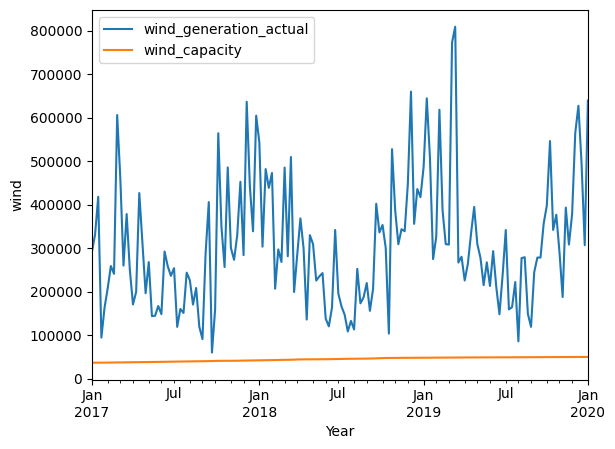

In [14]:
wind_plot = ["wind_generation_actual","wind_capacity"]
df_wind[wind_plot].resample("w").mean().plot(kind="line",lw = 1.5)
plt.xlabel('Year')
plt.ylabel('wind')

In [ ]:
#df_wind['3-MA'] = df_wind['wind_generation_actual'].rolling(3, center=True).mean()
#df_wind['7-MA'] = df_wind['wind_generation_actual'].rolling(7, center=True).mean()
#df_wind['9-MA'] = df_wind['wind_generation_actual'].rolling(9, center=True).mean()
#plt.plot(df_wind['9-MA'])

In [15]:
monthly_mean=df_wind["wind_generation_actual"].resample("m").mean()
weekly_mean=df_wind["wind_generation_actual"].resample("w").mean()
daily_mean=df_wind["wind_generation_actual"].resample("d").mean()

<Figure size 600x400 with 0 Axes>

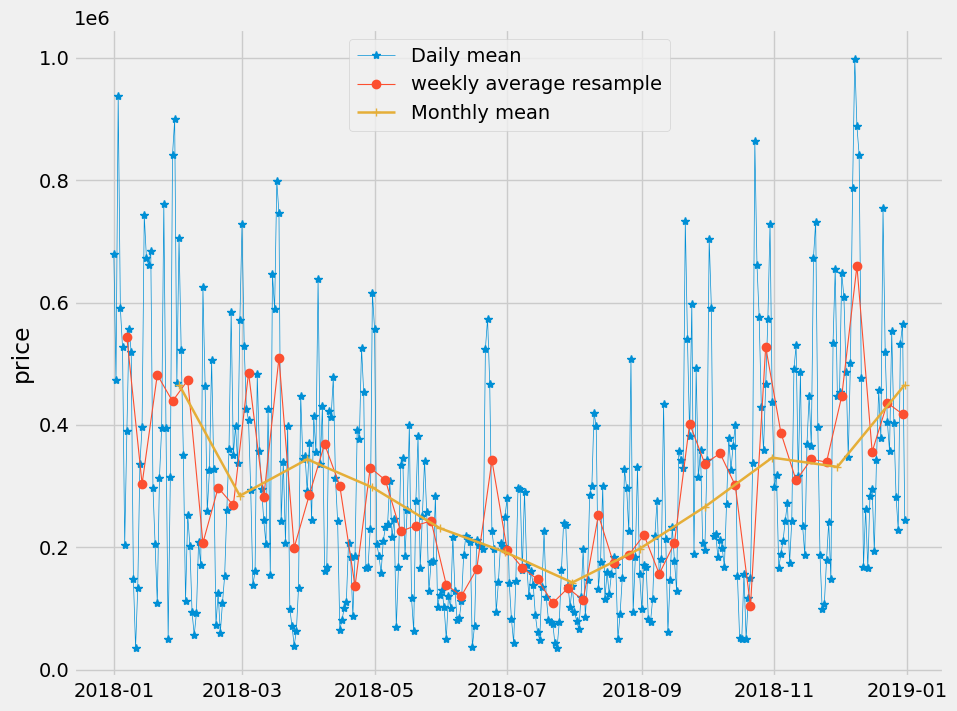

In [16]:
plt.figure(figsize=[6,4])
plt.style.use("fivethirtyeight")
fig,ax=plt.subplots(figsize=[10,8])
ax.plot(daily_mean.loc["2018-01":"2018-12"], marker="*", linewidth=0.5, label="Daily mean")
ax.plot(weekly_mean.loc["2018-01":"2018-12"], marker="o", linewidth=0.8, label="weekly average resample")
ax.plot(monthly_mean.loc["2018-01":"2018-12"], marker="+", linewidth=1.8, label="Monthly mean")
ax.set_ylabel("price")
ax.legend();

In [24]:
from sklearn.model_selection import train_test_split
x = df_wind.drop(['wind_capacity','temperature'], axis=1)
y = df_wind['wind_generation_actual']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)



# Step 1: Check for stationarity of time series

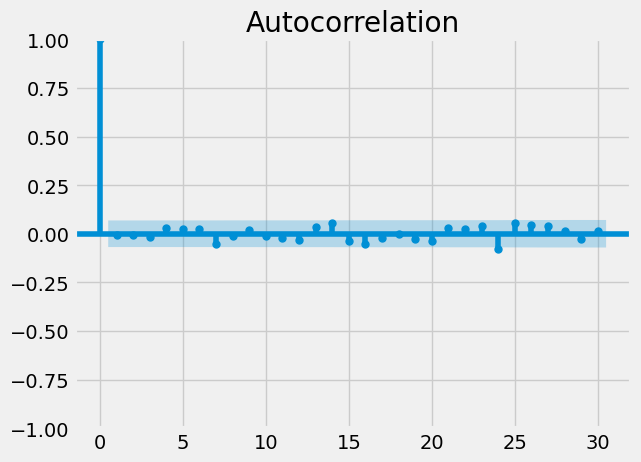

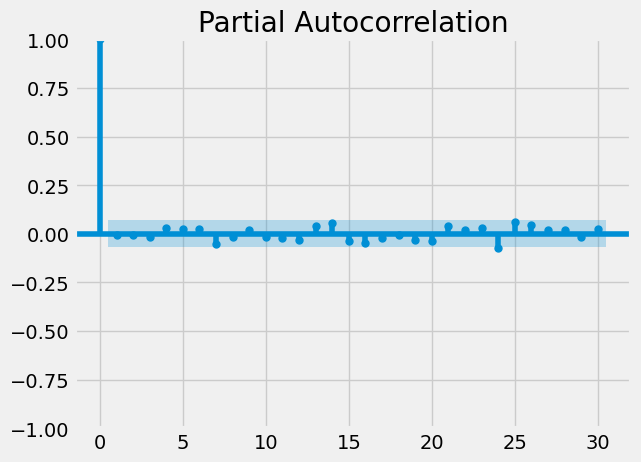

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_original = plot_acf(y_train)
pacf_original = plot_pacf(y_train)

In [27]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(y_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.0


<Axes: xlabel='utc_timestamp'>

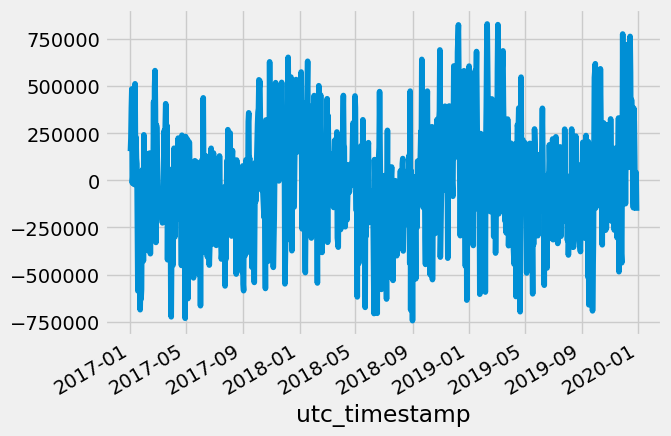

In [28]:
y_train_diff = y_train.diff().dropna()
y_train_diff.plot()

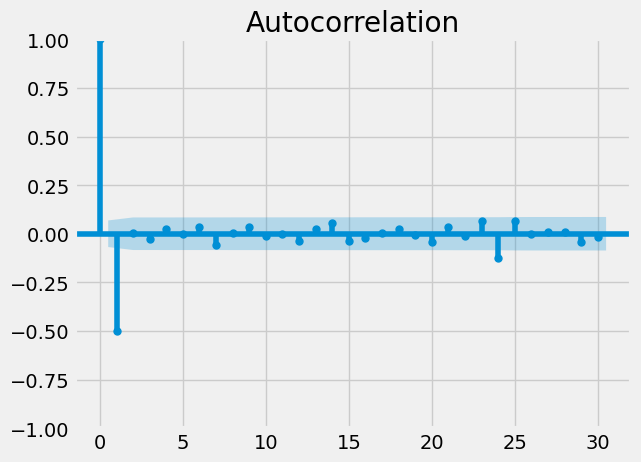

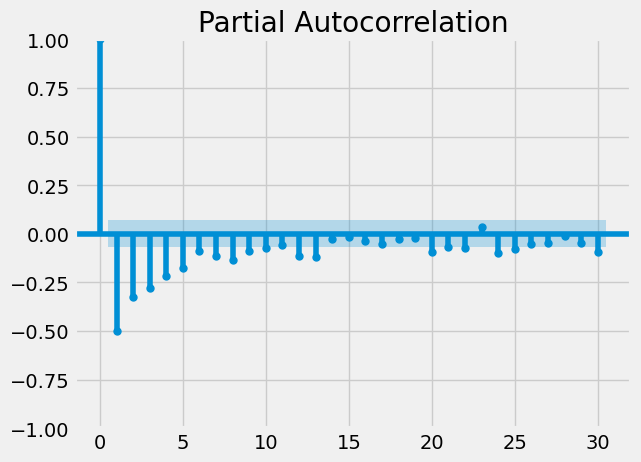

In [29]:
acf_diff = plot_acf(y_train_diff)

pacf_diff = plot_pacf(y_train_diff)

In [30]:
adf_test = adfuller(y_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 8.029539630551496e-20


In [32]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(y_train, order=(8,1,0))
model_fit = model.fit()
print(model_fit.summary())

c:\Users\danis\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\danis\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\danis\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\danis\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

                                 SARIMAX Results                                  
Dep. Variable:     wind_generation_actual   No. Observations:                  820
Model:                     ARIMA(8, 1, 0)   Log Likelihood              -11218.831
Date:                    Sun, 04 Feb 2024   AIC                          22455.661
Time:                            11:49:56   BIC                          22498.034
Sample:                                 0   HQIC                         22471.921
                                    - 820                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8937      0.037    -24.053      0.000      -0.967      -0.821
ar.L2         -0.7881      0.048    -16.566      0.000      -0.881      -0.695
ar.L3         -0.696

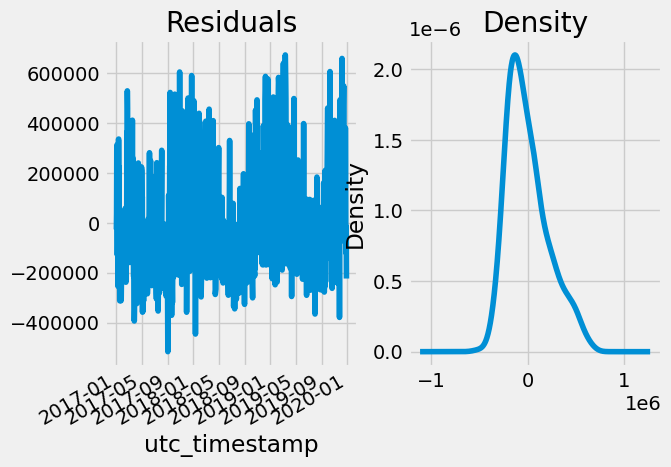

In [33]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

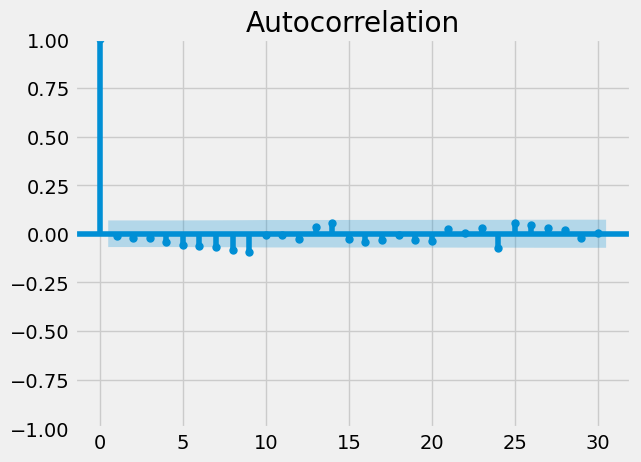

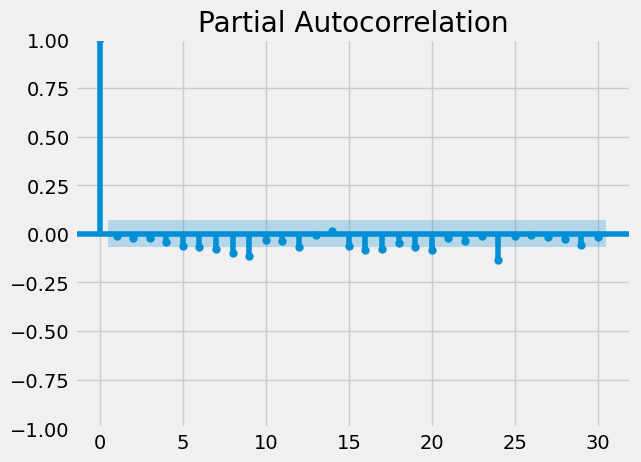

In [34]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

c:\Users\danis\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='utc_timestamp'>

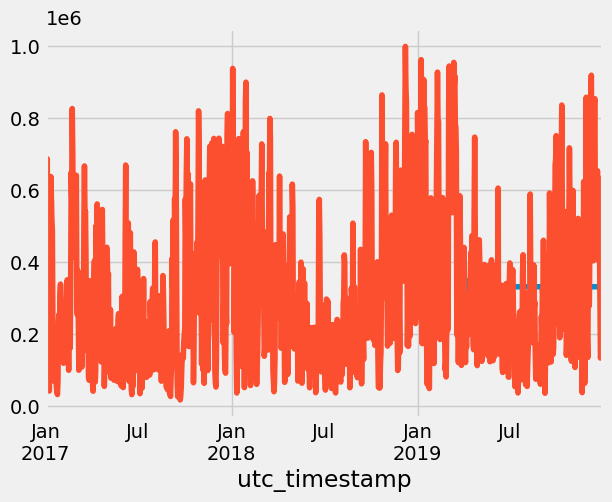

In [39]:
forecast_test = model_fit.forecast(len(y_test))

df_wind['forecast_manual'] = [None]*len(y_train) + list(forecast_test)

df_wind['forecast_manual'].plot()
df_wind['wind_generation_actual'].plot()

In [44]:
import pmdarima as pm
auto_arima = pm.auto_arima(y_train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(1, 0, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [45]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  820
Model:               SARIMAX(1, 0, 3)   Log Likelihood              -11199.704
Date:                Sun, 04 Feb 2024   AIC                          22409.408
Time:                        11:55:41   BIC                          22432.955
Sample:                             0   HQIC                         22418.443
                                - 820                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.000   5205.999      0.000       1.000       1.000
ma.L1         -0.9964      0.042    -23.582      0.000      -1.079      -0.914
ma.L2         -0.0012      0.055     -0.022      0.982      -0.110       0.107
ma.L3          0.0105      0.037      0.283      0.777      -0.062       0.083
sigma2      4.752e+10   2.51e-13   1.89e+23      0.000    4.75e+10    4.75e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               121.32
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.93
Prob(H) (two-sided):                  0.85   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.44e+40. Standard errors may be unstable.
"""

c:\Users\danis\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\danis\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='utc_timestamp'>

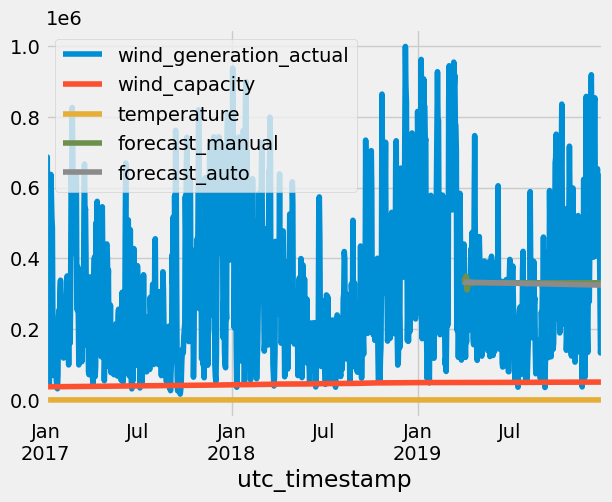

In [47]:
forecast_test_auto = auto_arima.predict(n_periods=len(y_test))
df_wind['forecast_auto'] = [None]*len(y_train) + list(forecast_test_auto)

df_wind.plot()

In [48]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(y_test, forecast_test)
mape = mean_absolute_percentage_error(y_test, forecast_test)
rmse = np.sqrt(mean_squared_error(y_test, forecast_test))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 175879.35633534452
mape - manual: 1.1524073105314958
rmse - manual: 211308.26660805347


In [49]:
mae = mean_absolute_error(y_test, forecast_test_auto)
mape = mean_absolute_percentage_error(y_test, forecast_test_auto)
rmse = np.sqrt(mean_squared_error(y_test, forecast_test_auto))

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

mae - auto: 175068.66206916078
mape - auto: 1.140600916002349
rmse - auto: 211005.41786865547
